<a href="https://colab.research.google.com/github/ia-nechaev/aqm2023/blob/main/Statistics_refresher_aqm_2023_ex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1. Descriptive statistics (ch2-4)

Picture in textbook page 120.

[Link to textbook resources](https://www.cengage.com/cgi-wadsworth/course_products_wp.pl?fid=M20b&product_isbn_issn=9781473768260&template=EMEA)

## Example: Cardio Good Fitness Case Study

The market research team at AdRight is assigned the task to identify the profile of the typical customer for each treadmill product offered by CardioGood Fitness. The market research team decides to investigate whether there are differences across the product lines with respect to customer characteristics. The team decides to collect data on individuals who purchased a treadmill at a CardioGoodFitness retail store during the prior three months. The data are stored in the CardioGoodFitness.csv file.

### The team identifies the following customer variables to study:
  - product purchased: TM195, TM498 or TM798;
  - gender;
  - age (years);
  - education (years);
  - relationship status: single or partnered;
  - annual household income ($);
  - average number of times the customer plans to use the treadmill each week;
  - average number of miles the customer expects to walk/run each week;
  - and self-rated fitness on an 1-to-5 scale, where 1 is poor shape and 5 is excellent shape.


In [3]:
# Loading packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

In [4]:
# Loading the dataset

mydata = pd.read_csv('https://raw.githubusercontent.com/ia-nechaev/ds4b-stats/main/data/CardioGoodFitness.csv')

## Data description and checks

In [6]:
# Checking the dataset

# mydata.head()
mydata.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120
179,TM798,48,Male,18,Partnered,4,5,95508,180


In [7]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
mydata.shape

(180, 9)

In [8]:
mydata.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [9]:
# Changing datatypes (every KB counts!)
mydata.Product=mydata.Product.astype("category")
mydata.Gender=mydata.Gender.astype("category")
mydata.MaritalStatus=mydata["MaritalStatus"].astype("category")
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.5 KB


In [10]:
# Verifying that there are no NULL values (although info() has already provided us this info)
mydata.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [ ]:
# Verifying that there are no NA values
mydata.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

For more information on missing values consult [this](https://https://jakevdp.github.io/PythonDataScienceHandbook/03.04-missing-values.html) chapter.

In [11]:
# Take a quick look at unique values in a column
mydata.Education.unique()

array([14, 15, 12, 13, 16, 18, 20, 21])

## Basic statistics

In [12]:
mydata.describe().T # T stands for transpose, pass the include='all' parameter to see categorial values

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0
Usage,180.0,3.455556,1.084797,2.0,3.00,3.0,4.00,7.0
Fitness,180.0,3.311111,0.958869,1.0,3.00,3.0,4.00,5.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0


In [14]:
# Which model sells best?
mydata.Product.value_counts()

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64

In [16]:
# Who buys treadmills more: men or women?
mydata['Gender'].value_counts()


Male      104
Female     76
Name: Gender, dtype: int64

In [17]:
# Which is the most popular model by gender? # pd.crosstab()
pd.crosstab(mydata['Product'],mydata['Gender'])

Gender,Female,Male
Product,,
TM195,40,40
TM498,29,31
TM798,7,33


In [ ]:
help(pd.crosstab)

## Visualisation

[Matplotlib cheatsheets and handouts](https://matplotlib.org/cheatsheets/)



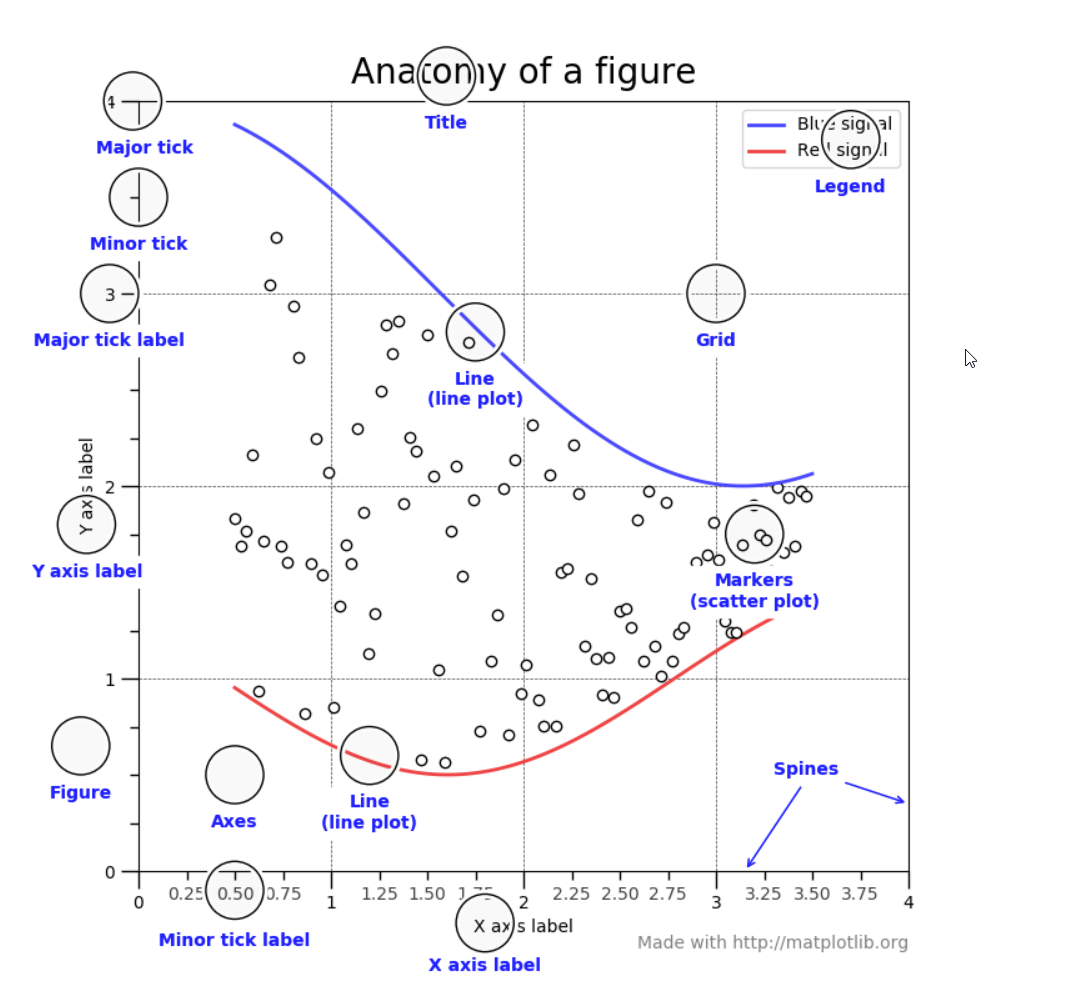

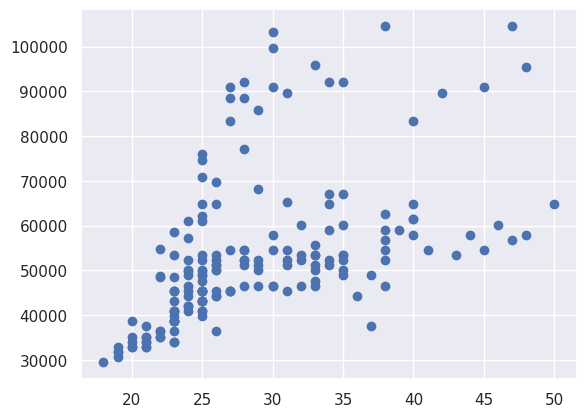

In [18]:
plt.scatter(mydata.Age,mydata.Income)

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Education'}>],
       [<Axes: title={'center': 'Usage'}>,
        <Axes: title={'center': 'Fitness'}>],
       [<Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Miles'}>]], dtype=object)

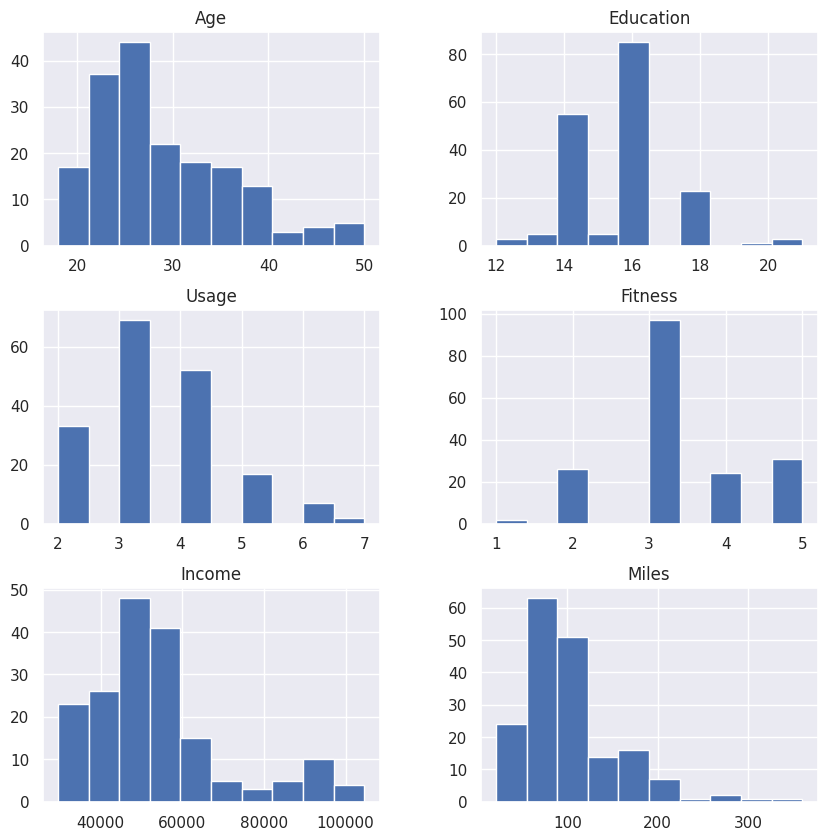

In [ ]:
mydata.hist(figsize=(10,10))

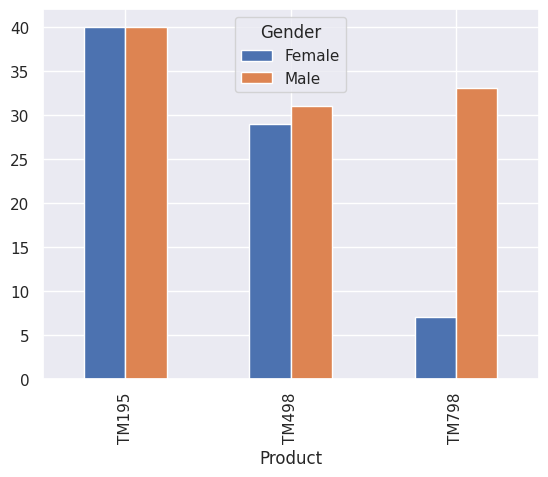

In [20]:
pd.crosstab(mydata.Product, mydata.Gender).plot(kind='bar');

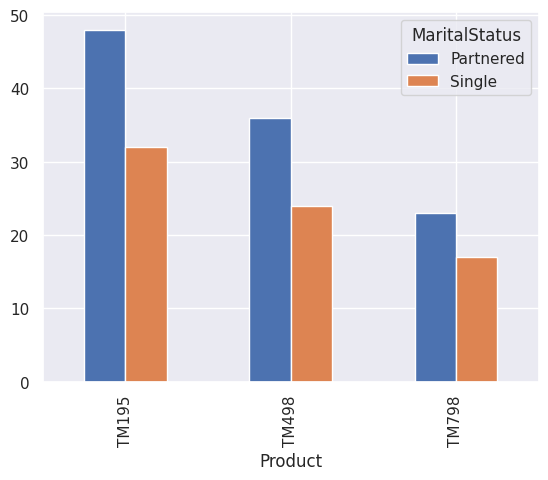

In [21]:
# Is sale of different products vary by Marital status of the customer?
pd.crosstab(mydata.Product, mydata.MaritalStatus).plot(kind='bar');

Boxplot refresher:


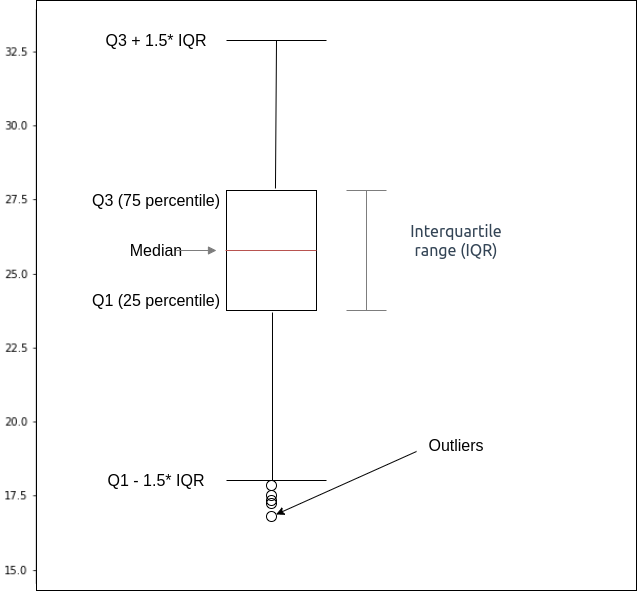

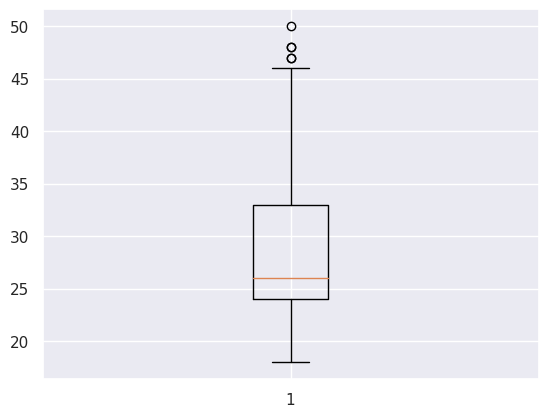

In [22]:
plt.boxplot(mydata.Age)
plt.show()

For seaborn plotting consult their original [tutorial](http://seaborn.pydata.org/tutorial.html). Or sns [cheat-sheet in pdf](http://datacamp-community-prod.s3.amazonaws.com/263130e2-2c92-4348-a356-9ed9b5034247) by datacamp.



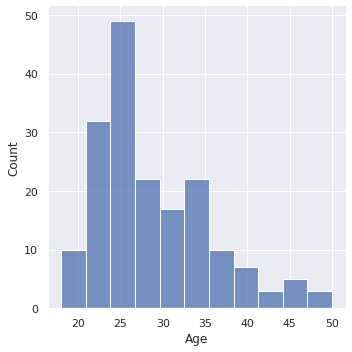

In [ ]:
sns.displot(mydata['Age'])

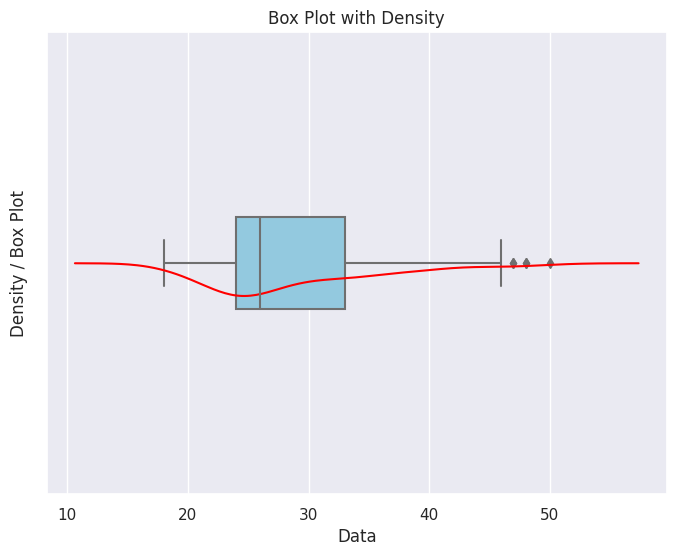

In [23]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=mydata.Age, width=0.2, color='skyblue')
sns.kdeplot(mydata.Age, color='red')  # Overlay the KDE plot

# Customize the plot
plt.title("Box Plot with Density")
plt.xlabel("Data")
plt.ylabel("Density / Box Plot")

# Show the plot
plt.show()

<Axes: xlabel='Gender', ylabel='Age'>

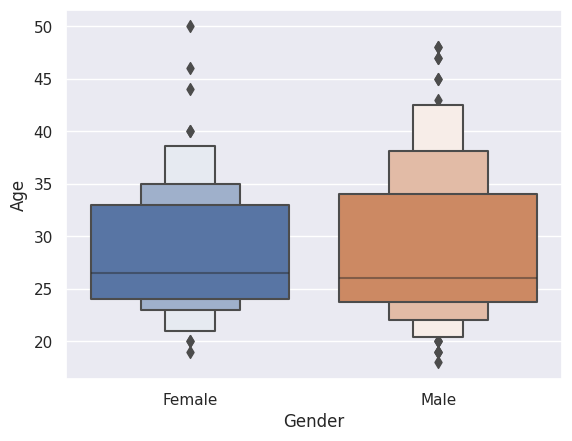

In [24]:
sns.boxenplot(x='Gender',y='Age',data=mydata)

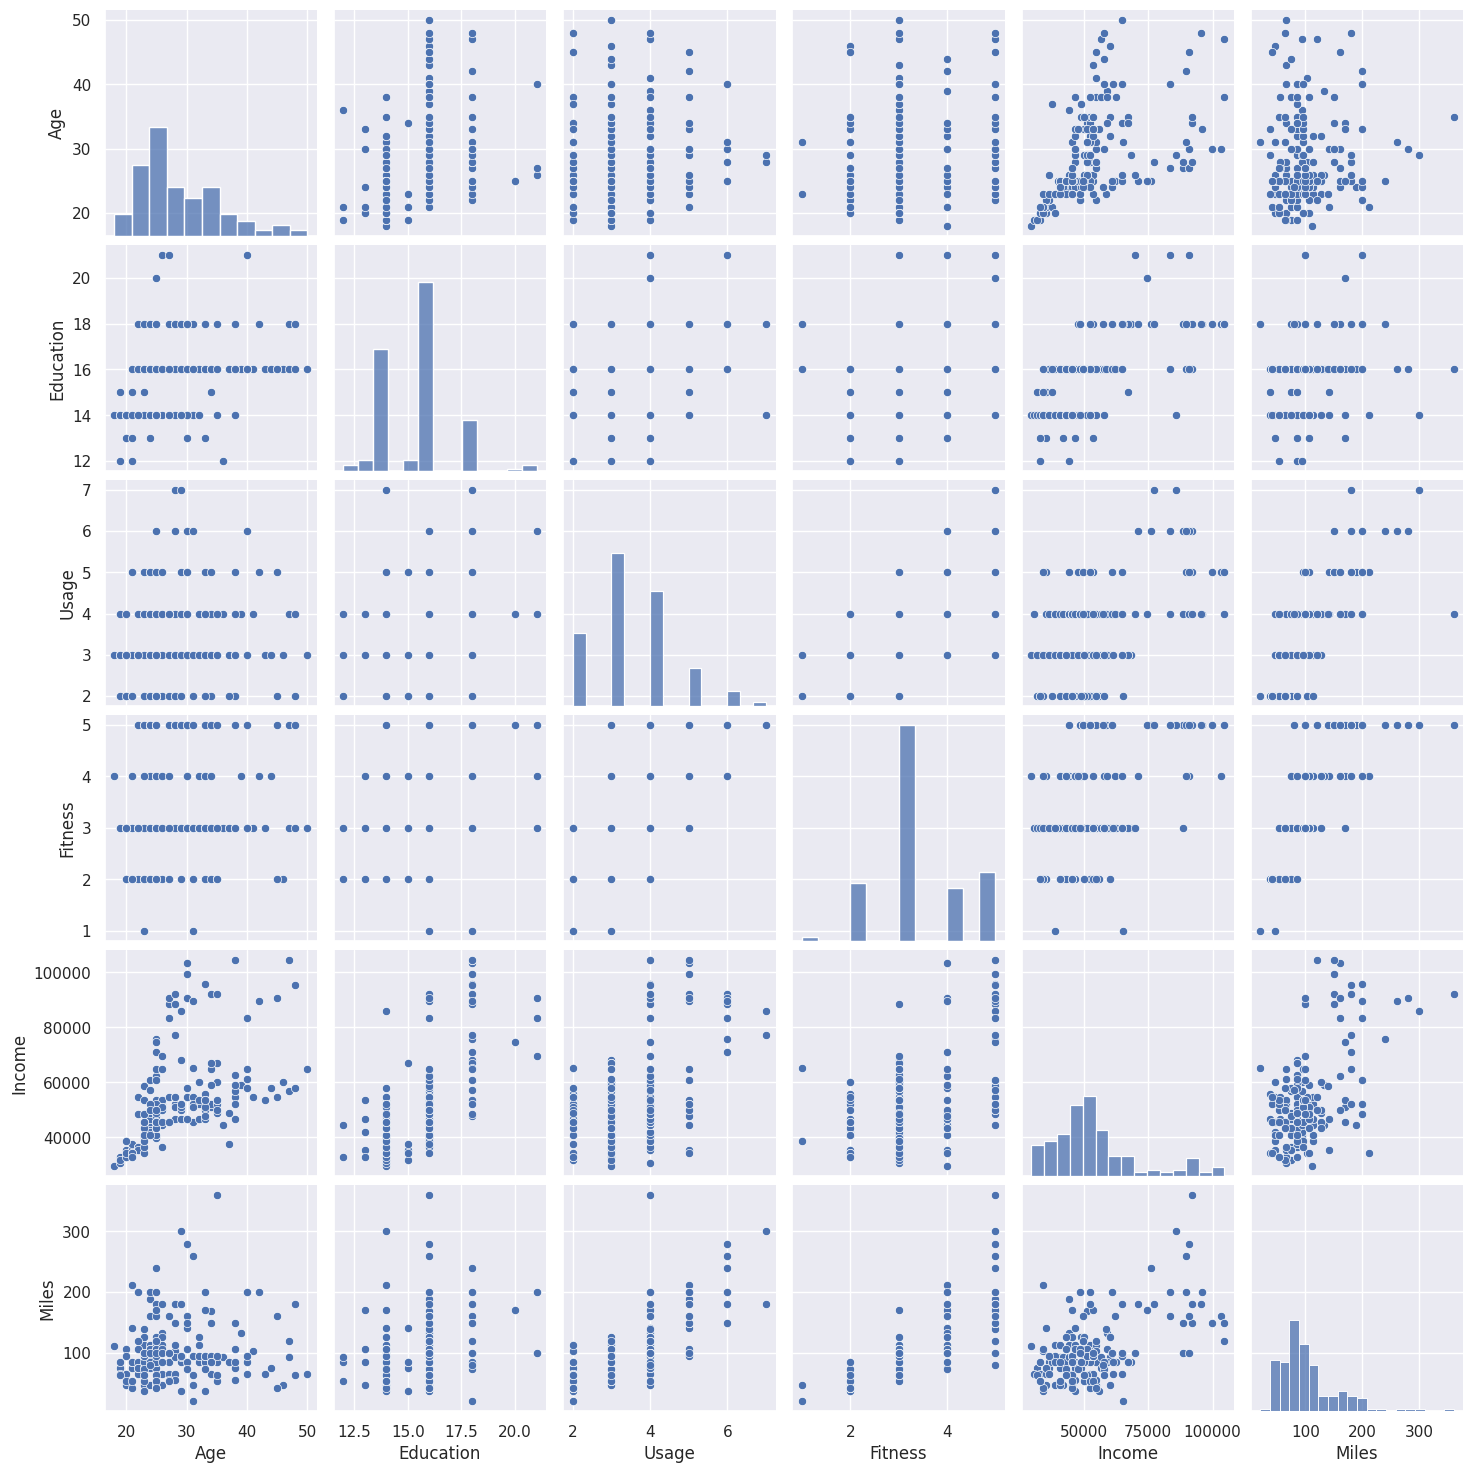

In [25]:
sns.pairplot(mydata)

In [26]:
mydata['Miles'].corr(mydata['Fitness'])

0.7857017433982372

In [27]:
mydata['Miles'].cov(mydata['Fitness'])

39.07324643078832

<ipython-input-28-d87431c491e6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(mydata.corr(),annot=True)


<Axes: >

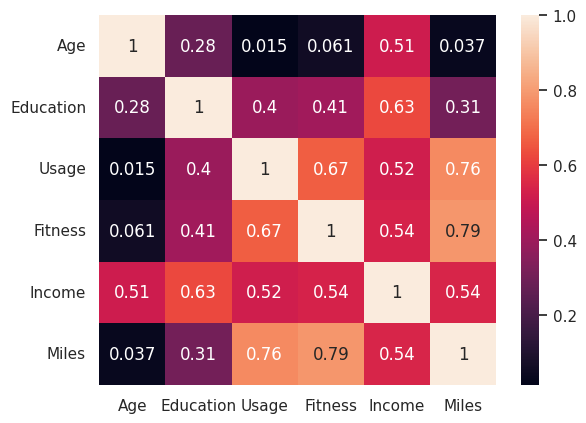

In [28]:
sns.heatmap(mydata.corr(),annot=True)

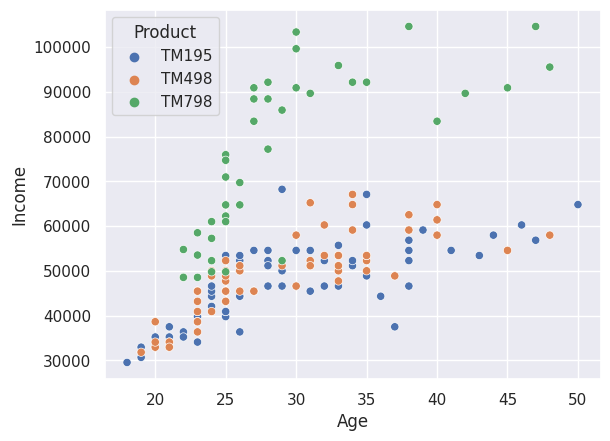

In [29]:
# How do income and age affect the decision of which model is bought?

sns.scatterplot(x='Age', y='Income',data=mydata, hue = 'Product')
plt.show()

# Part 2. Probability, distributions, confidence intervals (ch6-9)



## Probability



#### Simple probability
Refers to the probability of an event without any condition.
Probability of an event X, P(X) is given by
$P(X) = \frac{Number \, of \, observations \, in \, favor \, of \, an \, event \, X}{Total \, Number \, of \, observations}$





#### Joint Probability
Refers to the probability of occurrence involving two or more events.
Let A and B be the two events in a sample space. Then the joint probability if the two events denoted by $P(A \, \cap \, B)$, is given by
$P(A \cap B) = \frac{Number \, of \, observations \, in \, A \,\cap \, B } {Total \, Number \, of \, observations}$



#### Conditional Probability
Refers to the probability of event A, given information about the occurrence of another event B. Probability of A given B is written as $P(A \mid B)$.

$P(A \mid B) = \frac{P(A \, and \, B)}{P(B)}$

where
* $P(A \mid B)$ — joint probability of A and B;
* $P(B)$ — probability of B

The following table describes loan default status at a bank and their marital status.

| Marital Status | Loan Defaulted | Loan No Default | Total |
| ----------- | ------ | ------- | -------- |
| Single | 42 | 258 | 300 |
| Married | 60 | 590 | 650 |
| Divorced | 13 | 37 | 50 |
| Total | 115 | 885 | 1000 |

Based on the above table, calculate the probability of default given divorced.

In [ ]:
# P1 = P(Default and Divorced)
P1   = 13 / 1000
# P2 = P(Divorced)
P2   = 50 / 1000
#P3  = P(Default | Divorced) = P(Default and Divorced) / P(Divorced)
P3   = P1 / P2
print('P(Default | Divorced)  is ', P3) #%1.4f %

P(Default | Divorced)  is  0.25999999999999995


| Occupation Status | Loan defaulted | Loan non-default | Total |
| ----------------- | ---- | ----- | ---- |
| Self Employed     | 80 | 240 | 320 |
| Employed in Private Sector | 120 | 860 | 980 |
| Employed in Government Sector | 200 | 3000 | 3200 |
| Total | 400 | 4100 | 4500 |

What is the conditional probability of default, given the occupation category Self Employed?

In [ ]:
# Solution here:

## Distributions


### A normal distribution
Is an arrangement of a data set in which most values cluster in the middle of the range and the rest taper off symmetrically toward either extreme. Height is one simple example of something that follows a normal distribution pattern: Most people are of average height the numbers of people that are taller and shorter than average are fairly equal and a very small (and still roughly equivalent) number of people are either extremely tall or extremely short.

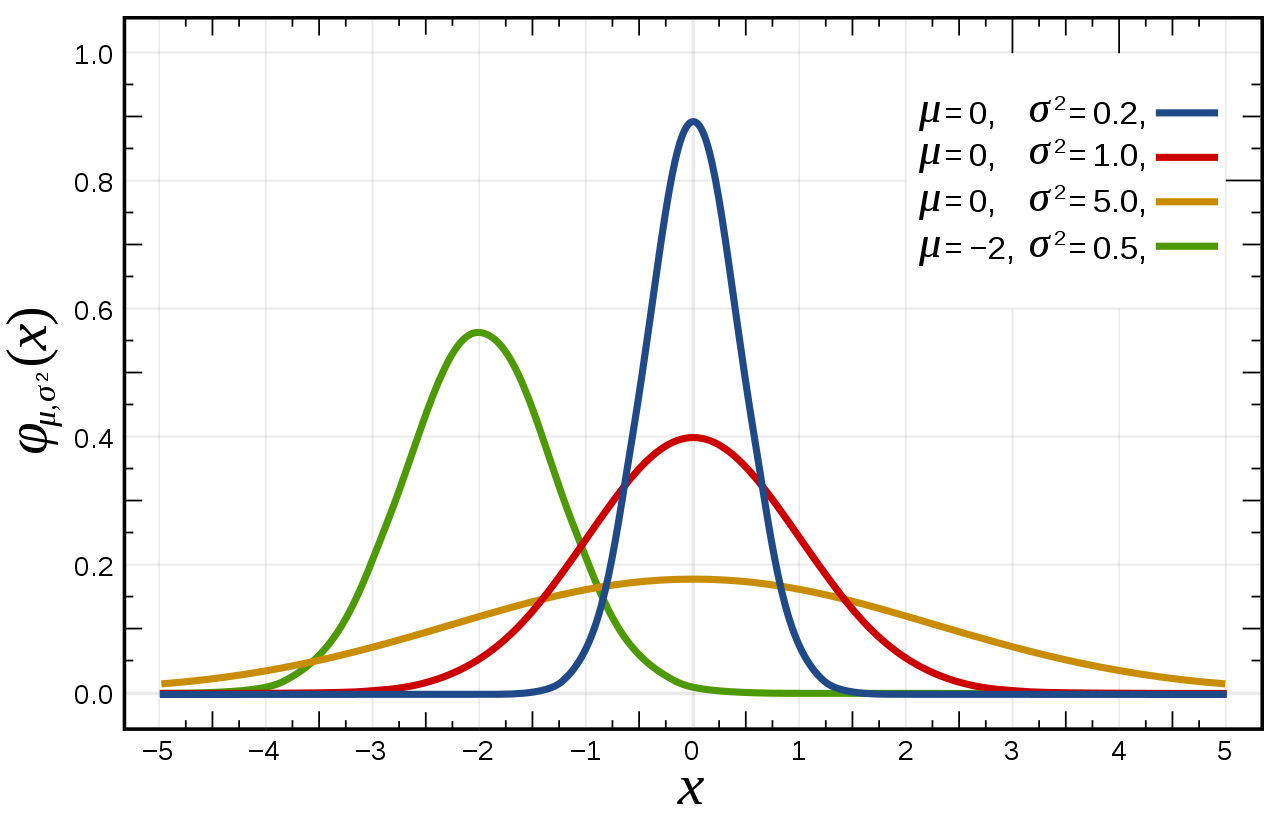

A graphical representation of a normal distribution is sometimes called a bell curve because of its flared shape. The precise shape can vary according to the distribution of the population but the peak is always in the middle and the curve is always symmetrical. In a normal distribution the mean mode and median are all the same.

### Gamma distribution
The gamma distribution represents continuous probability distributions of two-parameter family. Gamma distributions are devised with generally three kind of parameter combinations.

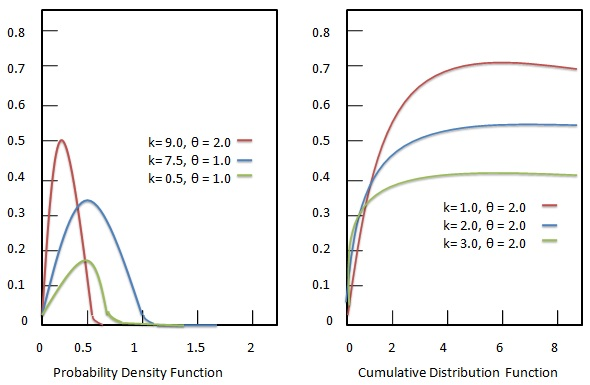

### Poisson distribution
Poisson conveyance is discrete likelihood dispersion and it is broadly use in measurable work. This conveyance was produced by a French Mathematician Dr. Simon Denis Poisson in 1837 and the dissemination is named after him. The Poisson circulation is utilized as a part of those circumstances where the happening's likelihood of an occasion is little, i.e., the occasion once in a while happens. For instance, the likelihood of faulty things in an assembling organization is little, the likelihood of happening tremor in a year is little, the mischance's likelihood on a street is little, and so forth. All these are cases of such occasions where the likelihood of event is little.

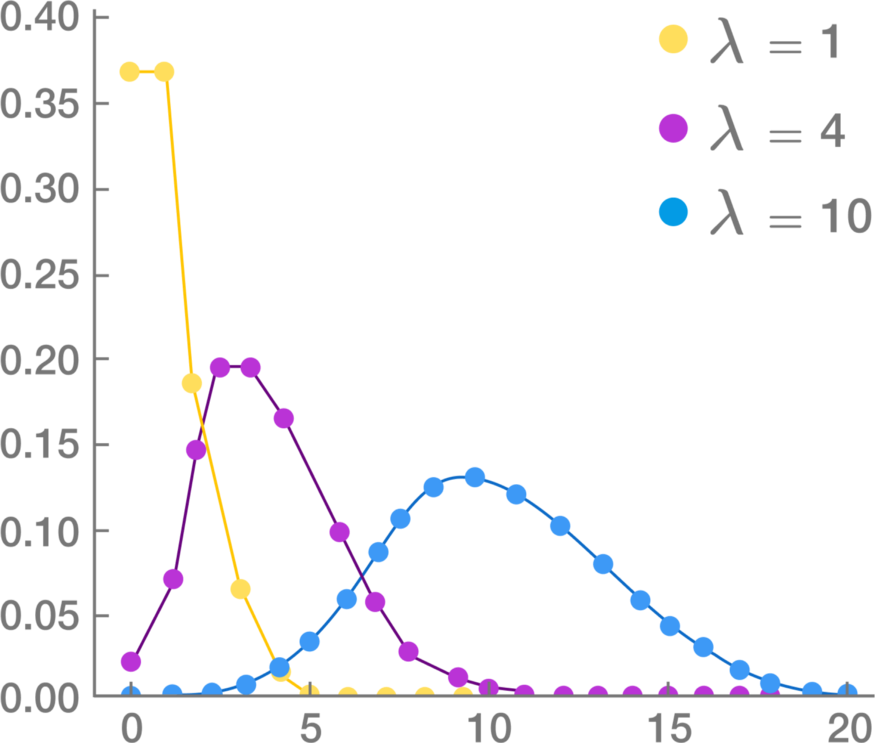

### NumPy [help](https://numpy.org/doc/stable/reference/index.html)

### Distribution Random generators

<Axes: >

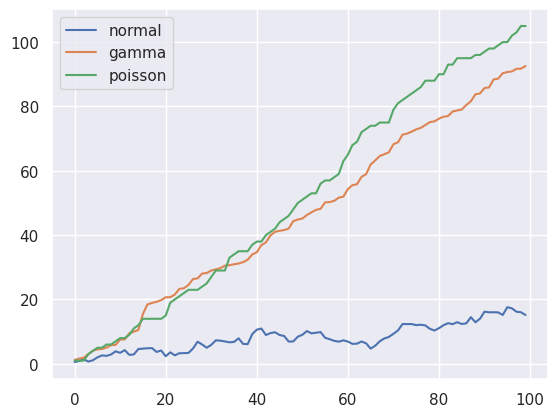

In [30]:
mydistribution = pd.DataFrame({'normal': np.random.normal(size=100),
                       'gamma': np.random.gamma(1, size=100),
                       'poisson': np.random.poisson(size=100)})
mydistribution.cumsum(0).plot()

A histogram is a graphical representation of the distribution of numerical data. It is an estimate of the probability distribution of a continuous variable (quantitative variable).

Text(0.5, 0, 'Values')

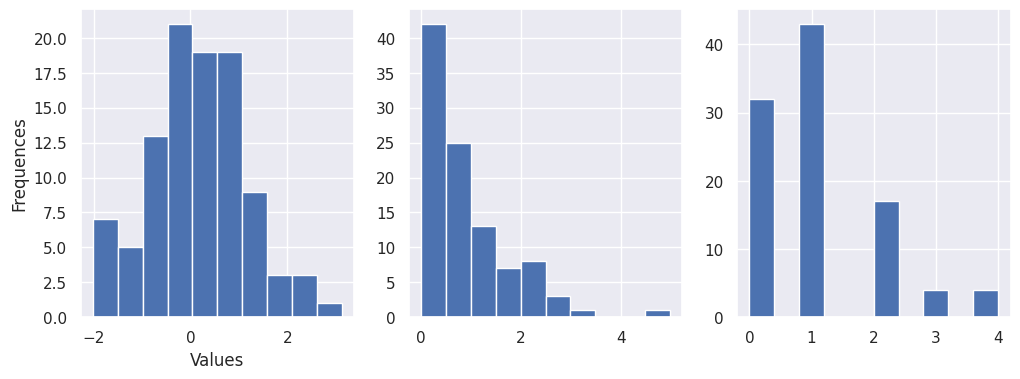

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i,var in enumerate(['normal','gamma','poisson']):
    mydistribution[var].hist(ax=axes[i]) # What plotting package is involved here?
axes[0].set_ylabel('Frequences')
axes[0].set_xlabel('Values')

Histograms of distribution by number of events, for an increasing prevalence of events (arbitrary scales, to show the general pattern). As the prevalence changes from rare (black line, extreme left distribution) to common (purple line, extreme right distribution), the pattern changes from Poisson to Gaussian.

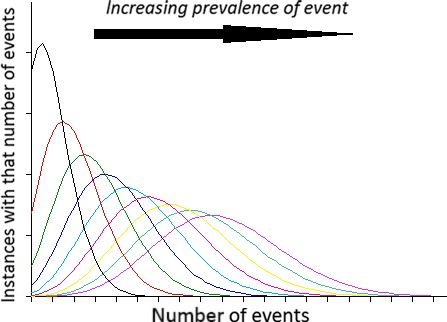

## Central limit theorem

[3Blue1Brown video on the topic](https://www.youtube.com/watch?v=zeJD6dqJ5lo)

Galton board

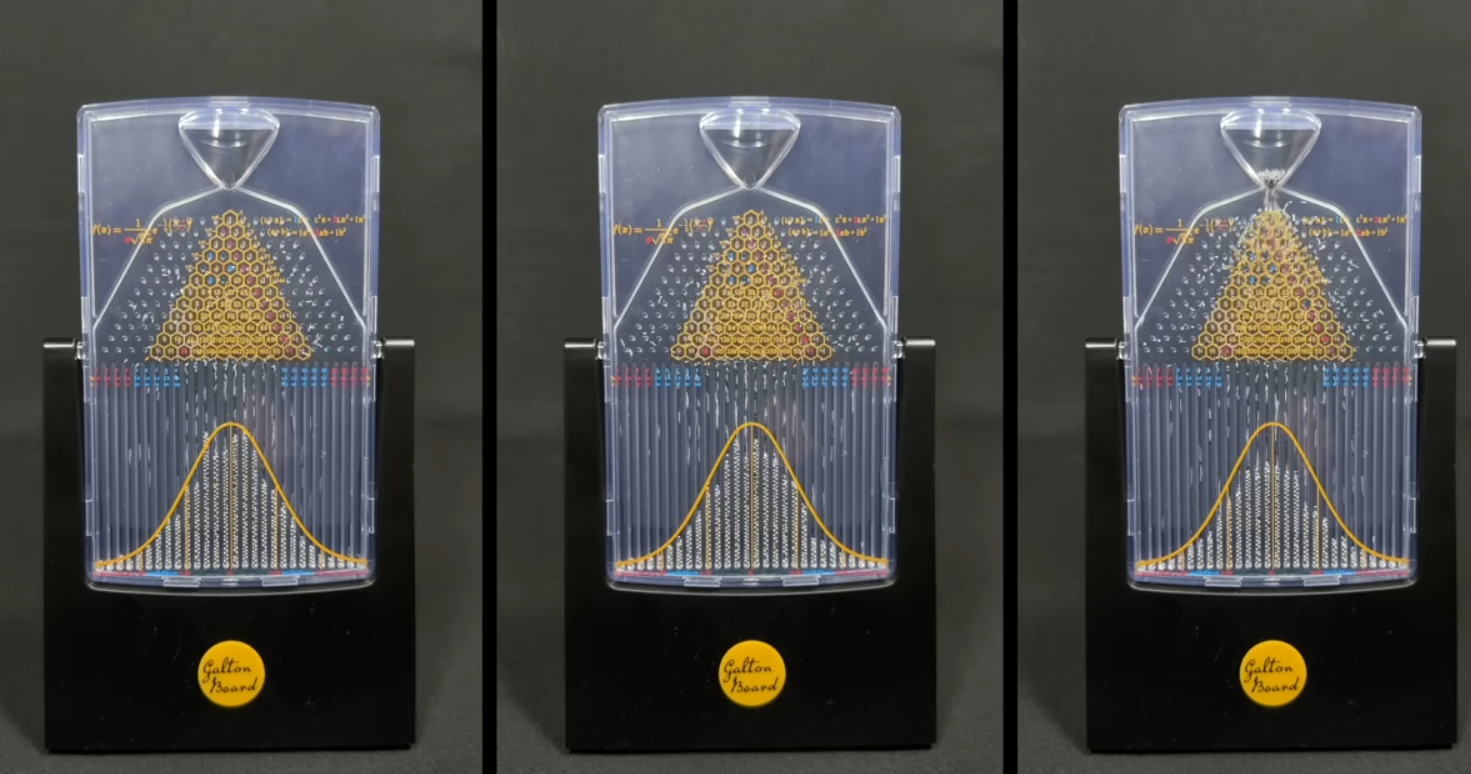

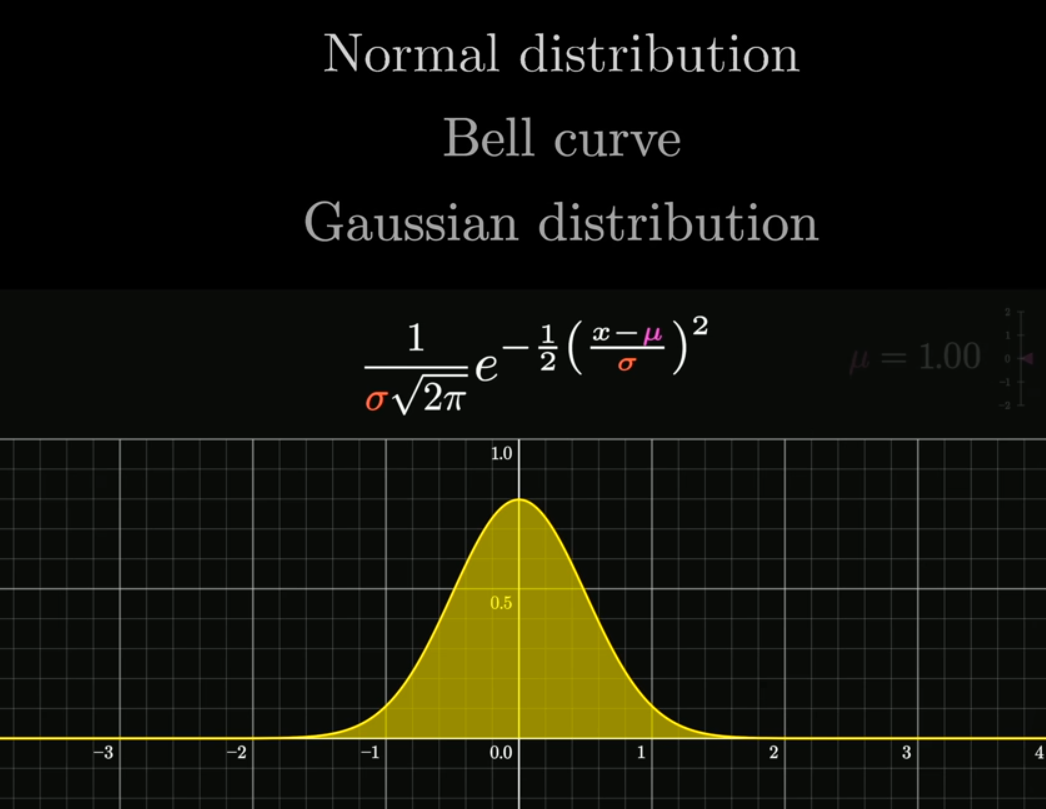

## Coin flip experiment (binomial)

Visualisation of coin flip ([link](https://www.random.org/coins/?num=1&cur=60-dkk.10kr))

### Making a coin flip game

### Virtual fliping

Visualisation of coin flip game ([link](https://www.random.org/coins/?num=10&cur=60-dkk.10kr))

In [32]:
# random number generator
rng = np.random.default_rng(12345)
rng.random()

0.22733602246716966

In [33]:
# coin flip function
def coin_flip(p):
    return(1*(rng.random()>=p))

In [34]:
# testing coin flip
coin_flip(1/2)


0

In [35]:
# coin game function
def game(n,p=0.5): # number of games, probability
    draw = []
    for i in range(0,n):
            draw.append(coin_flip(p))
    return(draw)

In [36]:
# Play the coin game 10 times
game(10)

[1, 1, 0, 0, 1, 0, 1, 1, 0, 1]

In [39]:
# Check the mean of 10 games
coin_mean = np.mean(game(10))
coin_mean

0.7

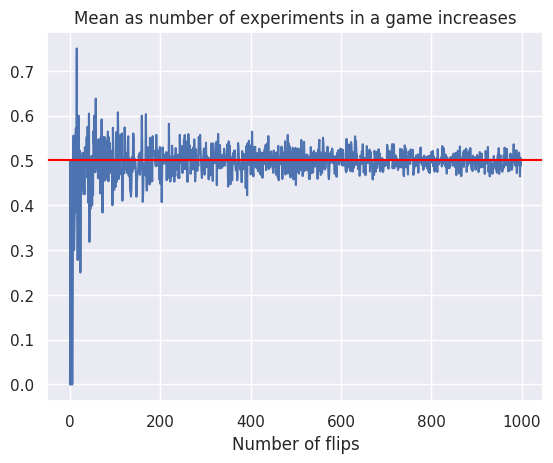

In [40]:
means = []
N = 1000
for i in range(1,N):
  means.append(np.mean(game(i)))

plt.plot(means)
plt.axhline(y=0.5,color='red')
plt.title('Mean as number of experiments in a game increases')
plt.xlabel('Number of flips')
plt.show()

## Confidence intervals


When there is an uncertainity around measuring the value of an important poulation parameter, it is better to find the range in which the range in which the value of the parameter is likely to lie rather than predicting a point estimate (single value).
* Confidence interval is the range in which the value of a population parameter is likely to lie with certain probability.
* Confidence interval provides additional information about the population parameter that will be useful in decision making.



Confidence interval for population mean

Let $X_1$, $X_2$, $X_3$, ..., $X_n$ be the sample means of samples, $S_1$, $S_3$,  $S_3$, ..., $S_n$ that are drawn from an independent and identically distributed population with mean, $\mu$ and stamdard deviation, $\sigma$.

From the Central Limit Theorem, we know that the sample means, $X_i$ follows a normal distribution with mean, $\mu$ and standard deviation $\frac{\sigma} {\sqrt{n}}$.

The variable $Z = \frac{X_i - \mu}{\frac{\sigma} {\sqrt{n}}}$ follows a standard normal variable.

Assume that we want to find $(1 - \alpha)$ 100% confidence interval for the population mean.
* We can distribute $\alpha$ (probability of not observing true population parameter mean in the interval) equally $(\alpha/2)$ on either side of the distribution shown
* For $\alpha = 0.05$ or $\alpha/2 = 0.025$, that is 95% confidence interval, we can calculate lower and upper values of the confidence interval from the standard normal distribution.
* scipy.stats.norm.isf(q = 0.025) gives the value of Z for which the area under the normal distribution is less than 0.025.
* The corresponding value is approximately 1.96.
* Using the transformation relationship between standard normal random variable Z and normal random variable X, we can write the 95% confidence interval for population mean when population standard deviation $(\sigma)$ is known as:
$\overline{X} \pm 1.96 \frac {\sigma} {\sqrt{n}}$, where $\overline{X}$ is the estimated value of mean from a sample of size $n$.

In general, $(1 - \alpha)$ 100% the confidence interval for the population mean when population standard deviation is known can be written as

$\overline{X} \pm Z _\frac{\alpha}{2} \frac {\sigma} {\sqrt{n}}$

This equation is valid for large sample sizes, irrespective of the distribution of the population.

John is a quality control analyst in a plant which required to fill 500 ml of liquid in bottles. Past studies have revealed that the bottles are filled with standard deviation 3 ml. John wants to check if the volume of liquid filled in bottles has changed. If the volume has changed then it is required to halt the production and reconfigure the machines. John takes 40 random samples and measures the volume of filled liquid. The sample mean is 501.5 ml. At 95% confidence level, find the confidence interval?

In [41]:
import scipy.stats as stats

In [45]:
se = 3/(40**0.5) # What is happening here?
se

0.4743416490252569

In [46]:
xbar = 501.5
z = stats.norm.isf(q=0.025)

LCI = xbar - z * se
print("LCI %4.2f" %LCI)
UCI = xbar + z * se
print("UCI %4.2f" %UCI)

LCI 500.57
UCI 502.43


Hindustan Pencils Pvt. Ltd. is an Indian manufacturer of pencils, writing materials and other stationery items, established in 1958 in Mumbai. Nataraj brand of pencils manufactured by the company is expected to have a mean length of 172 mm and the standard deviation of the length is 0.02 mm.

To ensure quality, a sample is selected at periodic intervals to determine whether the length is still 172 mm and other dimensions of the pencil meet the quality standards set by the company.

You select a random sample of 100 pencils.

Construct a 95% confidenct interval for the pencil length.


In [47]:
# Solution here:
se = 0.02/(100**0.5) # What is happening here?
se



0.002

In [55]:
xbar = 172
z = stats.norm.isf(q=0.025)

# the solution is right, the output formatting needed to be fixed to more digits after the dot
LCI = xbar - z * se
print("LCI %4.5f" %LCI)
UCI = xbar + z * se
print("UCI %4.5f" %UCI)

LCI 171.99608
UCI 172.00392


In [49]:
stats.norm.interval(0.95, loc = 172, scale=0.02/np.sqrt(100))

(171.9960800720309, 172.0039199279691)

# Part 3. Exercises 7.91—7.94

Plan on pp. 190-192

Answers ex. 7.91.

a 0.0128 0.0456

b 0.0161 0.0491

c 0.0117 0.0437





In [ ]:
# data = pd.read_excel()

In [ ]:
#import dataset
from google.colab import files

uploaded = files.upload()

In [52]:
data = pd.read_excel('Xr07-NASDAQ.xlsx')

In [53]:
# basic statistics (describe)
data.describe()

,Year,ADBE,AMZN,AAPL,BBBY,CSCO,CMCSA,COST,DLTR,EXPE,GRMN,INTC,MSFT,NFLX,ORCL,SNDK,SIRI,SPLS,SBUX
count,5.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,2013.000000,0.018451,0.023801,0.015267,0.000696,0.006746,0.017842,0.015681,0.021197,0.022947,0.007476,0.010829,0.015529,0.038991,0.004786,0.014033,0.017288,-0.007489,0.025175
std,1.581139,0.063885,0.080439,0.071109,0.067986,0.072525,0.055040,0.039688,0.059812,0.101975,0.061065,0.062239,0.062003,0.208099,0.058451,0.110431,0.081222,0.095456,0.056180
min,2011.000000,-0.118919,-0.131516,-0.144089,-0.204857,-0.189980,-0.104496,-0.064272,-0.174363,-0.290495,-0.102601,-0.117237,-0.130248,-0.518020,-0.181818,-0.253882,-0.163717,-0.205286,-0.150788
25%,2012.000000,-0.037106,-0.035416,-0.024419,-0.038856,-0.038346,-0.023792,-0.011356,-0.013578,-0.020540,-0.033945,-0.026314,-0.028699,-0.077231,-0.034714,-0.044551,-0.027043,-0.057190,-0.005657
50%,2013.000000,0.027894,0.019590,0.005506,0.002809,0.006640,0.018284,0.018884,0.020107,0.025353,0.003933,0.010449,0.016693,0.040920,0.007544,0.013332,0.007086,-0.010962,0.028467
75%,2014.000000,0.046391,0.079093,0.067920,0.044220,0.042098,0.047712,0.040885,0.054789,0.083546,0.044325,0.045174,0.051544,0.132346,0.041195,0.078469,0.071010,0.051940,0.055647
max,2015.000000,0.216798,0.235113,0.188311,0.162834,0.200225,0.132308,0.103246,0.152237,0.275419,0.191121,0.149953,0.196262,0.784642,0.142502,0.417265,0.206060,0.297661,0.150947


In [ ]:
# subset the data we need data[['1','2'..]]

In [2]:
# calculate mean

In [ ]:
# weights 25,25,25,25

In [ ]:
# make covariance matrix

In [ ]:
# use the formula to calculate mean and standard deviation of portfolio